asymptotic distance
tensor(3.5713e-07)
spectral radius


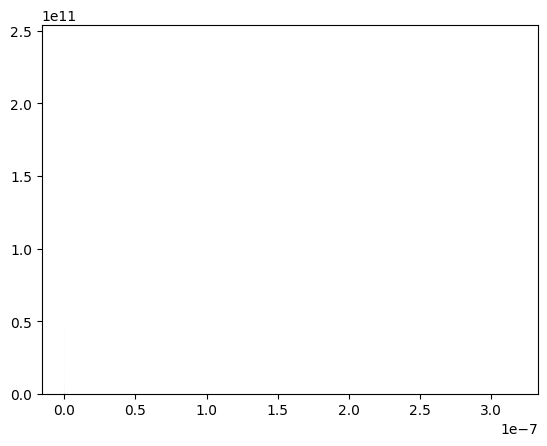

[8.65171717e-10 8.65171717e-10 5.63231128e-10 ... 3.89920368e-11
 1.91352021e-11 1.44467433e-11]
average
tensor(-8.9108e-12-1.2688e-18j)
tensor(1.7527e-19)


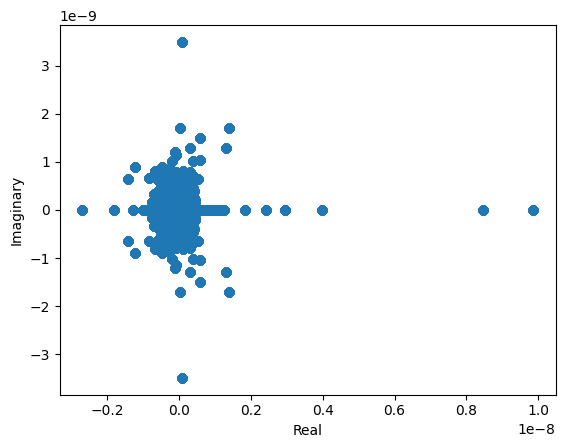

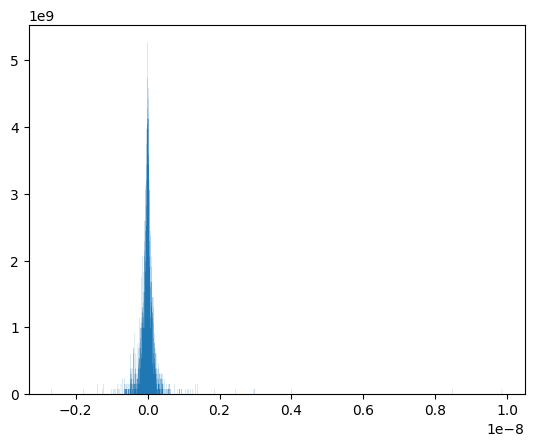

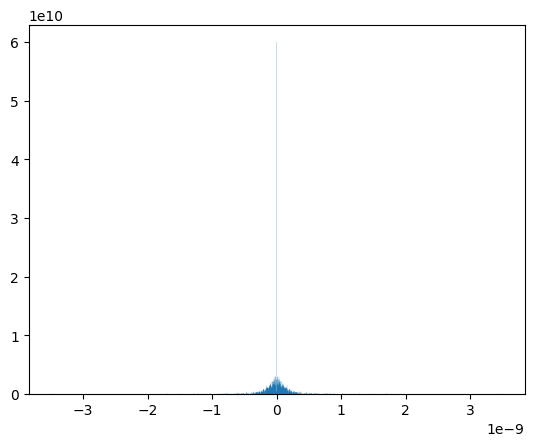

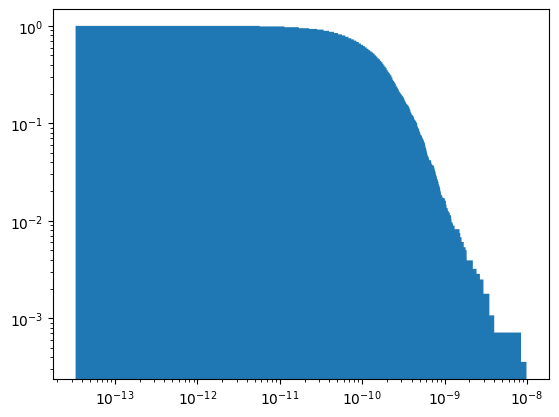

tensor(nan, device='cuda:0')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pareto 
from torch.distributions.pareto import Pareto
import torch
b=2
input_size=784
batch_size=100
strength=10**-6
N=28
m = Pareto(torch.tensor([1.0]), torch.tensor([1.0]))
res=m.sample(torch.Size([batch_size,1,N,N]))

temp=res/np.sqrt(res.var())/input_size*strength
noise=temp-temp.mean()
unperturbed=torch.zeros_like(noise)
    #print(noise[:,:,:,:,0].size())noise[:,:,:,:,0]
print("asymptotic distance")
print(torch.norm(noise-unperturbed))

#torch.set_default_dtype(torch.float64)
#m = Pareto(torch.tensor([1.0]), torch.tensor([1.0]))
#res=m.sample(torch.Size([batch_size,1,N,N]))
#print(res.var())
#temp=res/np.sqrt(res.var())/28*10**-6
#processed=temp[:,:,:,:,0]-temp[:,:,:,:,0].mean()
#print(processed)
#print(processed.var())
#print(processed.mean())
#print(res)
def spectral_radius(input_matrix):
    result=[]

    s,v=torch.linalg.eig(input_matrix)
    #print(s)
    abs=torch.abs(s)
    spectral=torch.max(abs).item()
    return spectral
def spectral_distribution(input_matrix):
    result=[]

    s,v=torch.linalg.eig(input_matrix)
    #abs=torch.abs(s)
    #print(s)
    return s

#print(res[:,:,0].size())

spectral_radius(noise[:,:,:,:,0])
print("spectral radius")
distribution=np.asarray([])
plt.hist(noise.flatten(),density=True, bins='auto', histtype='stepfilled')
plt.show()
for i in range(100):
    s=spectral_distribution(noise[:,:,:,:,0])
    distribution=np.append(distribution,s)

print(np.abs(distribution))
print("average")
print(torch.mean(s))
print(torch.var(s))
x = [ele.real for ele in distribution]
# extract imaginary part
y = [ele.imag for ele in distribution]
  
# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
#plt.xlim(-200,200)
#plt.ylim(-200,200)
plt.show()

plt.hist(x, density=True, bins='auto', histtype='stepfilled')
#plt.xlim(-200,200)
plt.show()
plt.hist(y, density=True, bins='auto', histtype='stepfilled')
plt.show()
#plt.xscale("log")
plt.hist(np.abs(distribution), density=True, bins='auto', histtype='stepfilled',cumulative=-1)
plt.yscale("log")
plt.xscale("log")
plt.show()


a = torch.tensor(float('NaN')).cuda()
b=torch.tensor(3.0).cuda()
a+b

